In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set()

In [3]:
#loading our dataset
players_df = pd.read_csv('Fifa 23 Players Data.csv', sep=',')


In [4]:
#showing the top 10 best rated players and seeing some other features in our dataset

players_df.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [5]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [6]:
players_df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
#Checking the earliest year from 'Contract Until' so we can create a new 'Free Agent' column
players_df['Contract Until'] = pd.to_datetime(players_df['Contract Until'], errors='coerce')
earliest_expiry = players_df['Contract Until'].min()

print("Earliest contract expiry:")
print(earliest_expiry)

Earliest contract expiry:
2022-01-01 00:00:00


In [8]:
#creating a new column for 'Free Agent' with players whose contracts expired in 2022

players_df['Contract Until'] = pd.to_datetime(players_df['Contract Until'])
players_df['Free Agent'] = players_df['Contract Until'].dt.year == 2022
print(players_df.columns)


Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

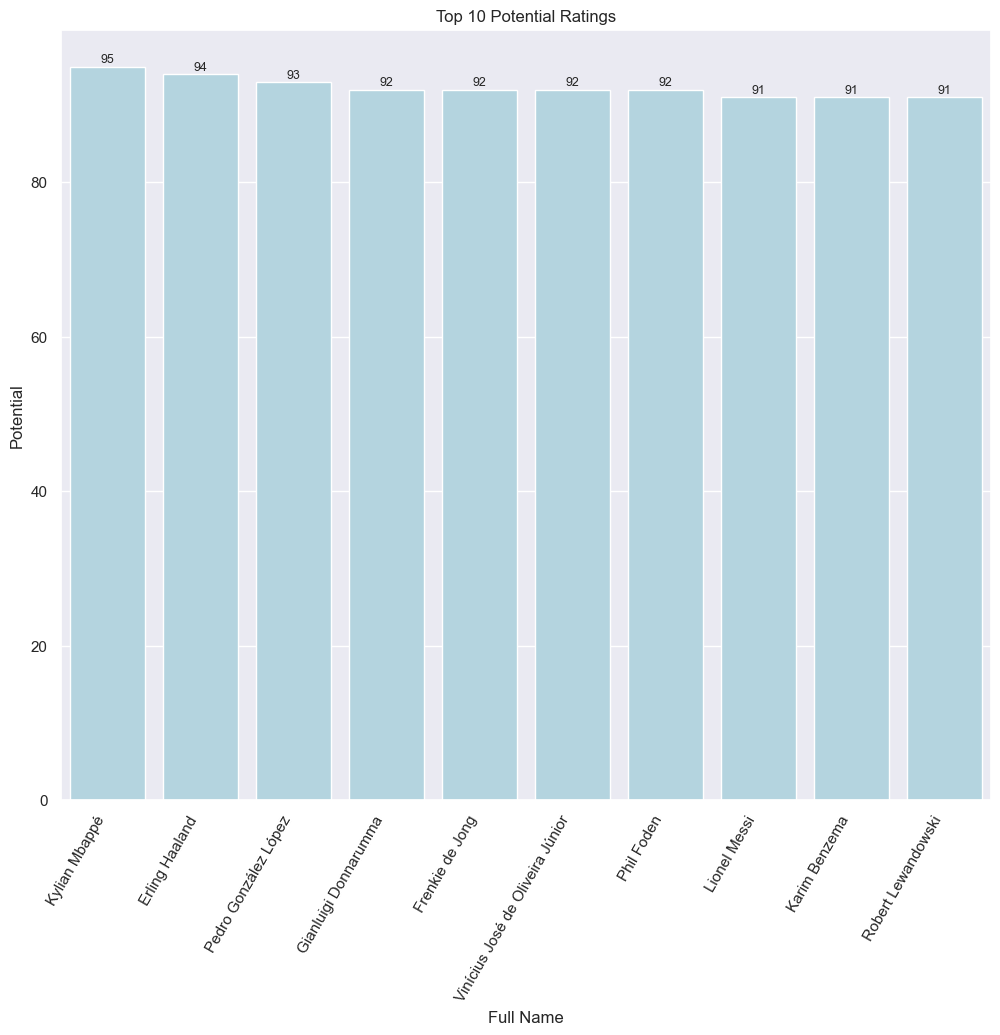

In [9]:
#We have seen the 10 highest players in terms of overall rating, but who are the 10 with highest potential?

top_10_potential = players_df.nlargest(10, 'Potential')
sns.set(style="darkgrid")

plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x='Full Name', y='Potential', data=top_10_potential, color='lightblue')
plt.xlabel('Full Name')
plt.ylabel('Potential')
plt.title('Top 10 Potential Ratings')
plt.xticks(rotation=60, ha='right')

for index in range(len(top_10_potential['Potential'])):
    value = top_10_potential['Potential'].iloc[index]
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

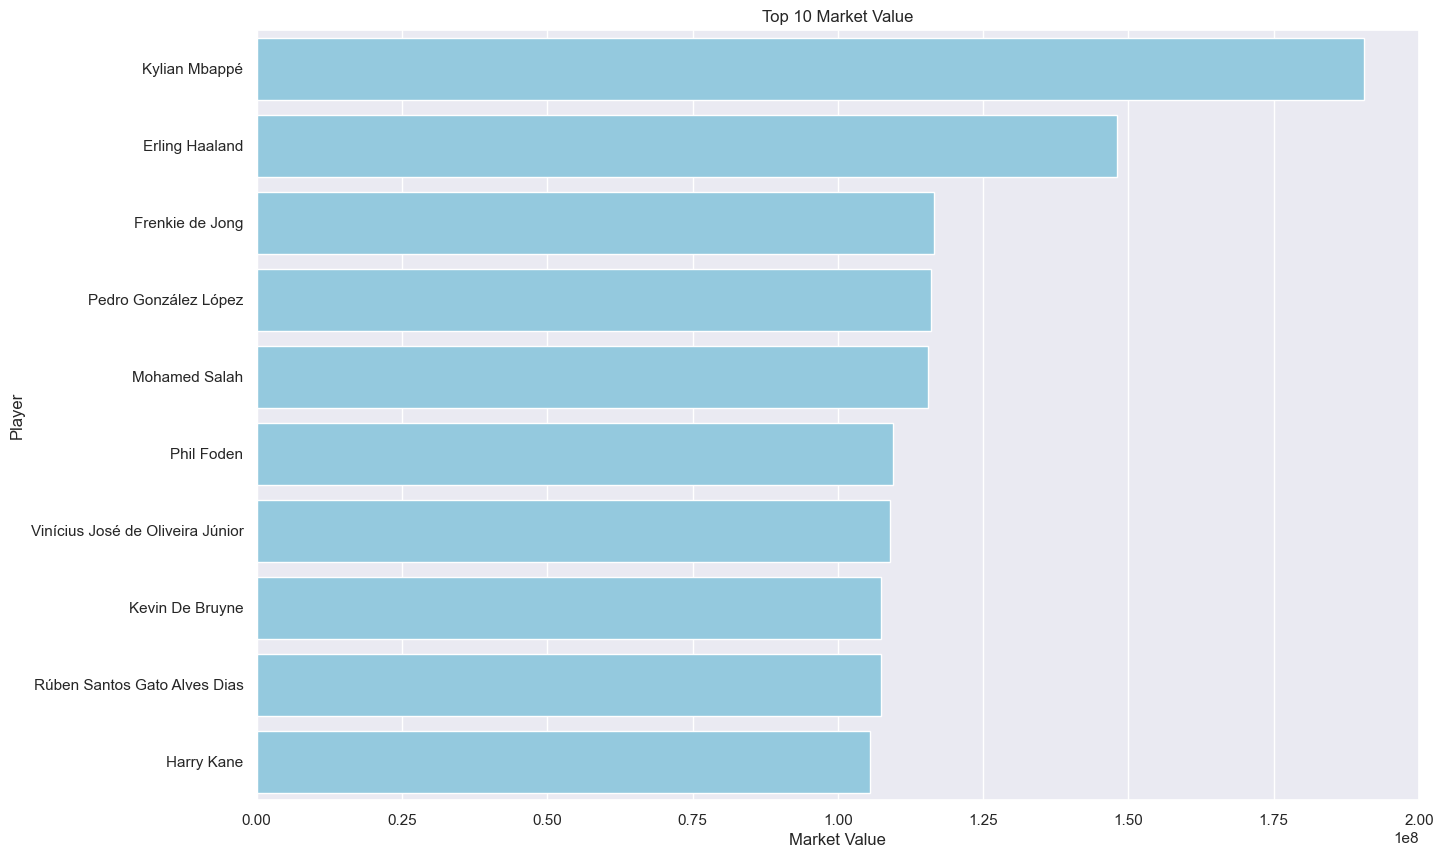

In [10]:
#seeing the top ten in terms of market value
#0.25 = 25 million

top_10_marketvalue = players_df.nlargest(10, "Value(in Euro)")
plt.figure(figsize=(15, 10))
sns.barplot(x='Value(in Euro)', y='Full Name', data=top_10_marketvalue, color='skyblue')
plt.xlabel('Market Value')
plt.ylabel('Player')
plt.title('Top 10 Market Value')
plt.show()


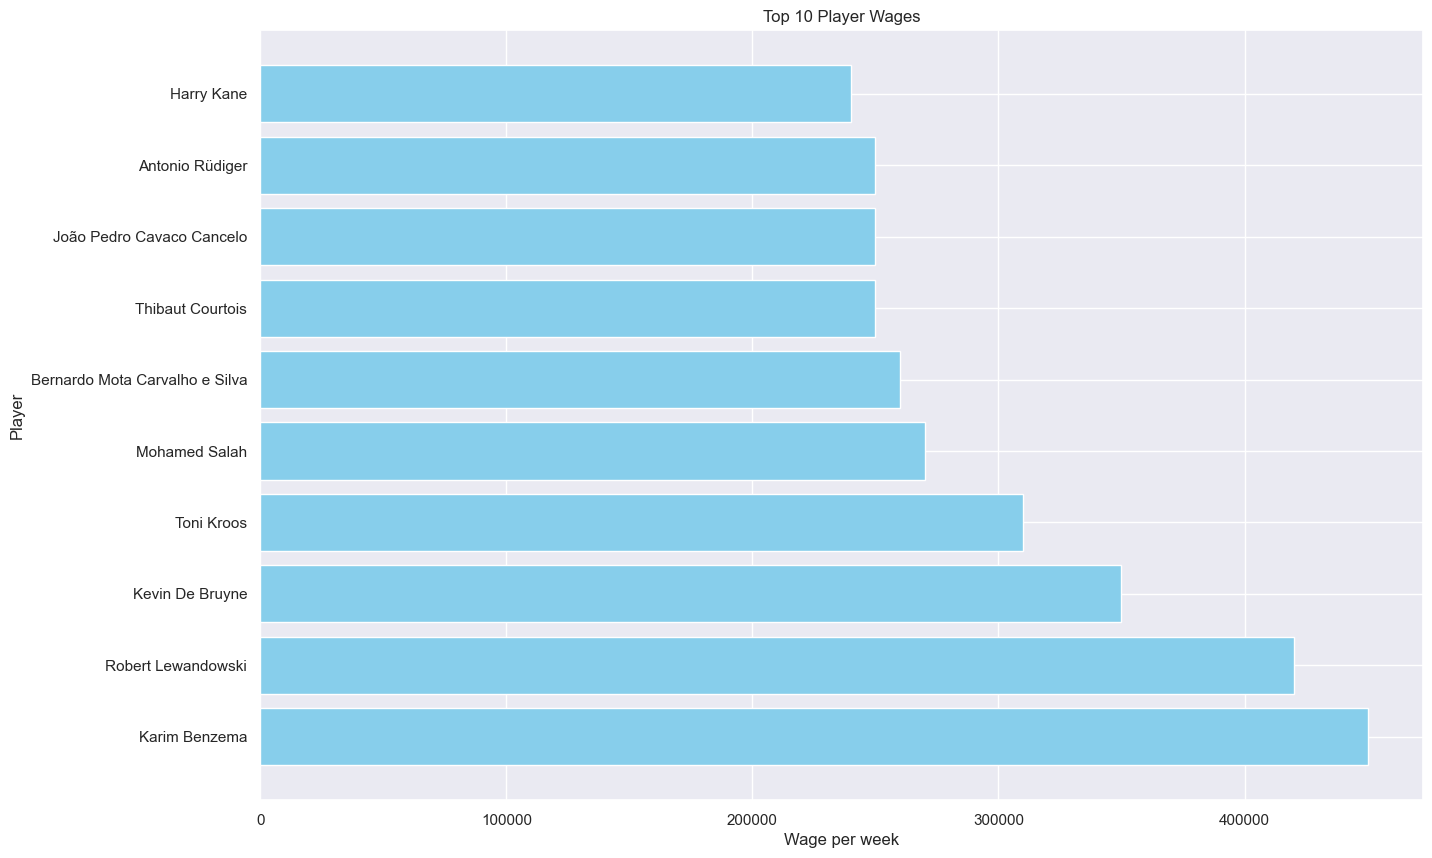

In [11]:
#and how does the highest wage list compare to the highest value?

top_10_wages = players_df.nlargest(10, "Wage(in Euro)")
plt.figure(figsize=(15, 10))
plt.barh(top_10_wages['Full Name'], top_10_wages['Wage(in Euro)'], color='skyblue')
plt.xlabel('Wage per week')
plt.ylabel('Player')
plt.title('Top 10 Player Wages')
plt.show()

#We can see that only 3 of the highest in terms of market value appear in the 10 highest wage list (Kane, Salah, De Bruyne)

C:\Users\Jon S\AppData\Local\Temp\ipykernel_620\647747344.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Youngest', 'Oldest', 'Average'], y=[youngest_age, oldest_age, average_age], palette='viridis')


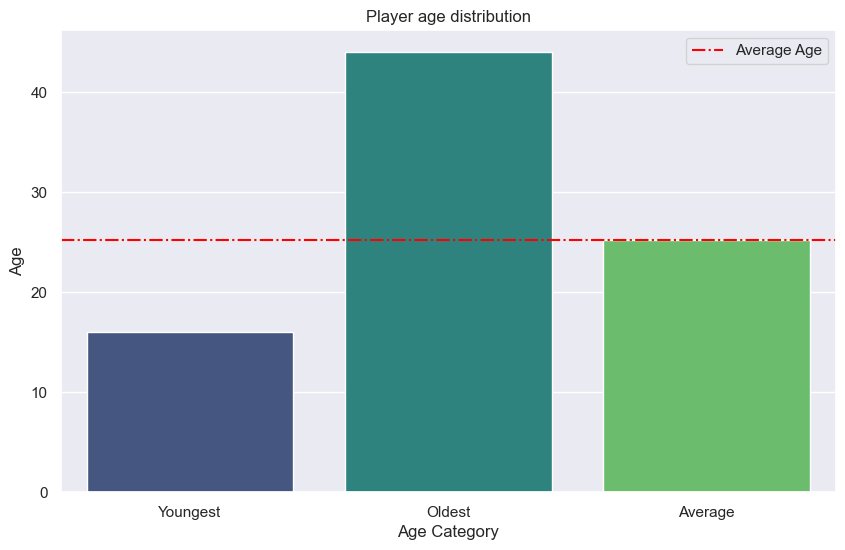

In [12]:
#but this project is about younger players in the game - anyone from the youngest age up to the average age.

youngest_age = players_df['Age'].min()
oldest_age = players_df['Age'].max()
average_age = players_df['Age'].mean()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=['Youngest', 'Oldest', 'Average'], y=[youngest_age, oldest_age, average_age], palette='viridis')
plt.axhline(y=average_age, color='red', linestyle='-.', label='Average Age')
plt.title('Player age distribution')
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.legend()
plt.show()

#We can see that 25 is the average age, with 16 being the youngest. 


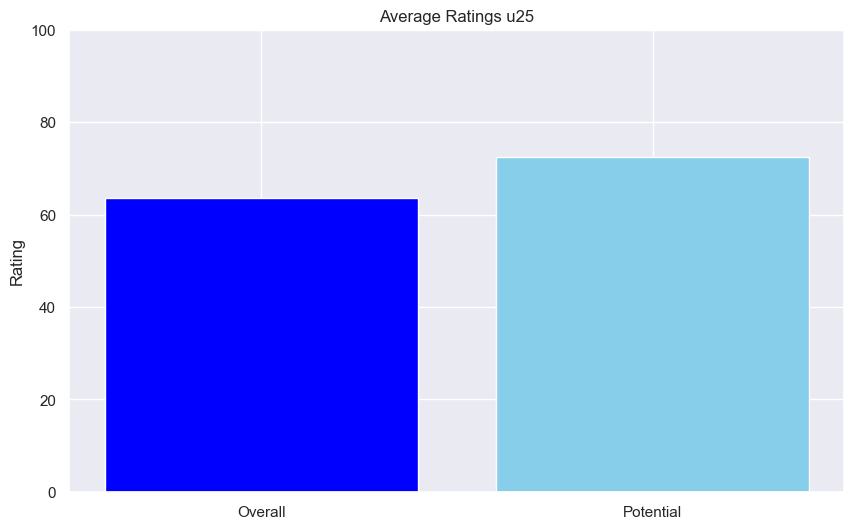

In [13]:
#determining the average overall and potential ratings for younger players

average_overall_younger = players_df[players_df['Age'] <= 25]['Overall'].mean()
average_potential_younger = players_df[players_df['Age'] <= 25]['Potential'].mean()

plt.figure(figsize=(10, 6))
plt.bar(['Overall', 'Potential'], [average_overall_younger, average_potential_younger], color=['blue', 'skyblue'])
plt.title('Average Ratings u25')
plt.ylabel('Rating')
plt.ylim(0, 100)
plt.show()

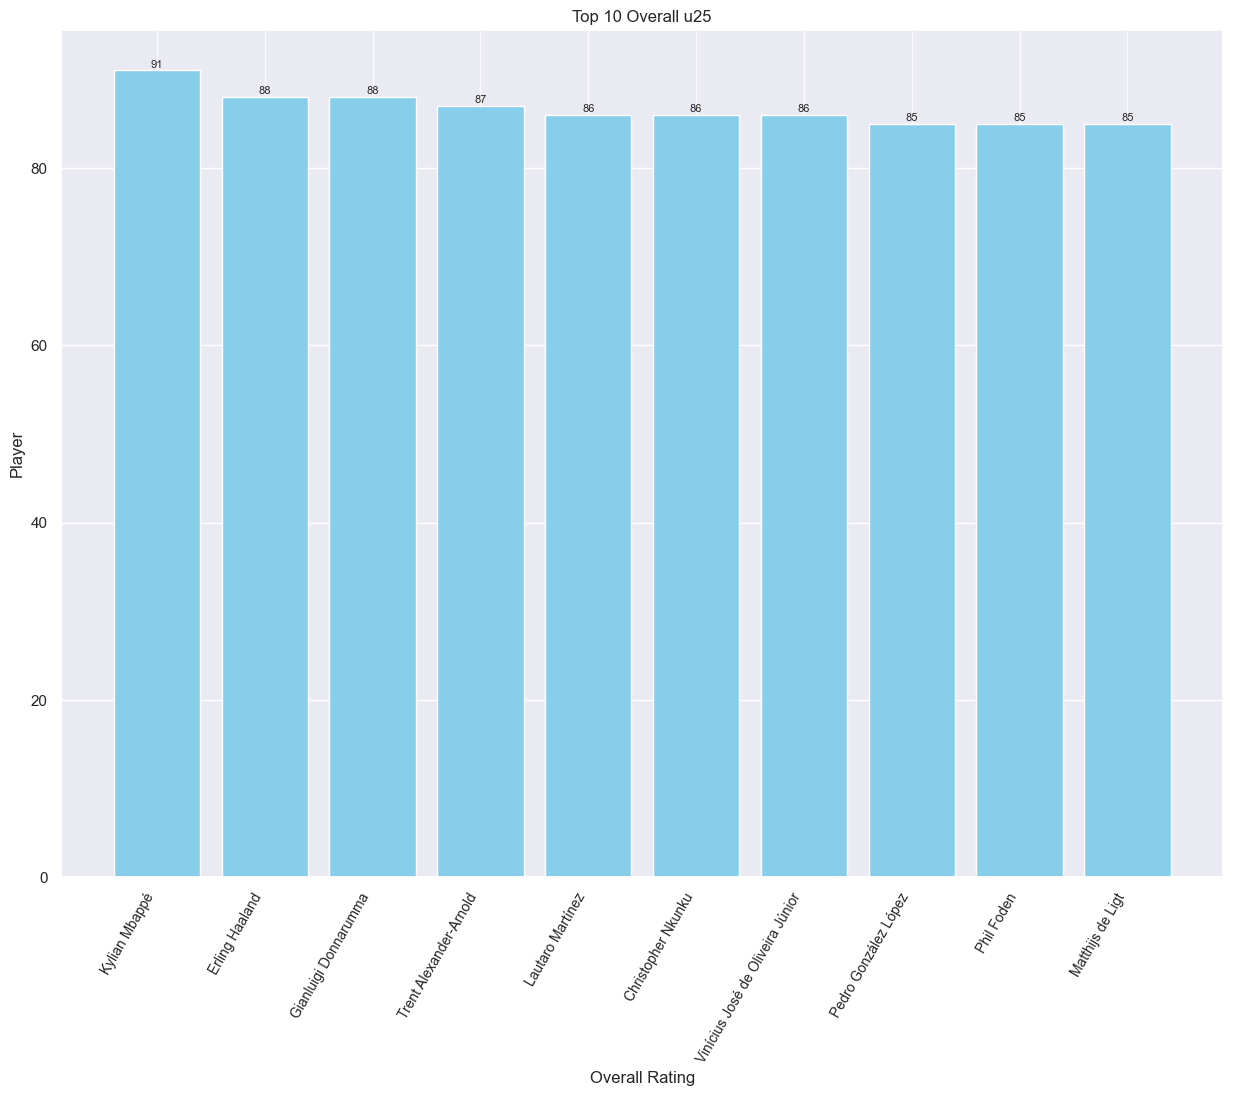

In [14]:
#seeing how the top ten overall u25 compares

top_10_u25 = players_df[players_df["Age"] < 25].nlargest(10, "Overall")

plt.figure(figsize=(15, 11))
bar_plot = plt.bar(top_10_u25['Full Name'], top_10_u25['Overall'], color='skyblue')
plt.xlabel('Overall Rating')
plt.ylabel('Player')
plt.title('Top 10 Overall u25')
plt.grid(axis='x', alpha=0.8)
plt.xticks(rotation=60, ha='right', fontsize=10)

for index, value in enumerate(top_10_u25['Overall']):
    bar_plot[index].set_height(value)
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.show()

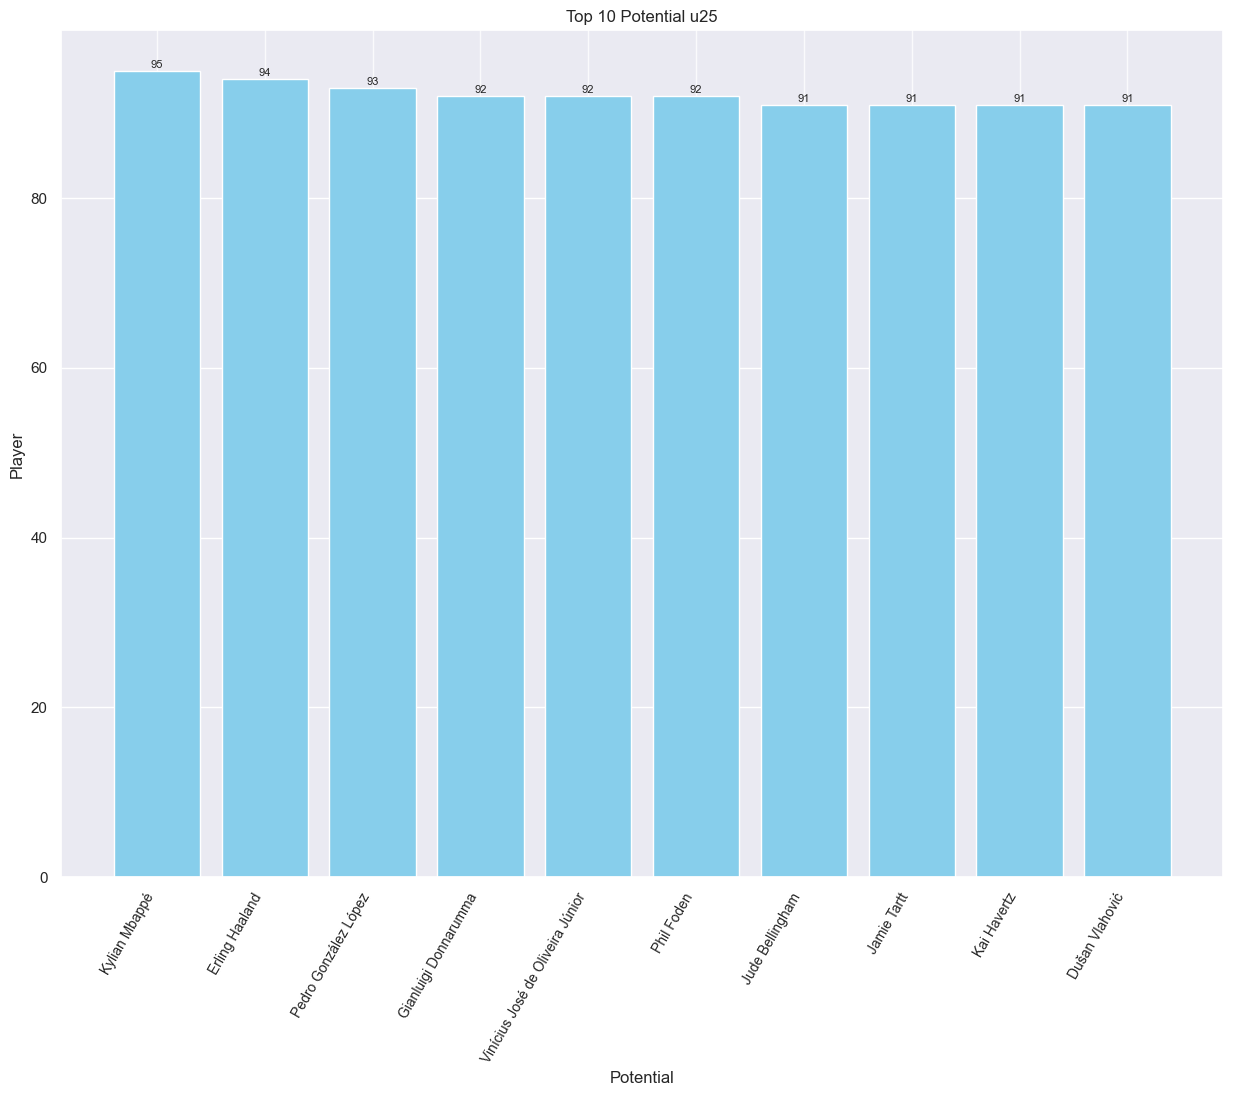

In [15]:
#and top ten in terms of potential

top_10_u25_potential = players_df[players_df["Age"] < 25].nlargest(10, "Potential")

plt.figure(figsize=(15, 11))
bar_plot = plt.bar(top_10_u25_potential['Full Name'], top_10_u25_potential['Potential'], color='skyblue')
plt.xlabel('Potential')
plt.ylabel('Player')
plt.title('Top 10 Potential u25')
plt.grid(axis='x', alpha=0.8)
plt.xticks(rotation=60, ha='right', fontsize=10)

for index, value in enumerate(top_10_u25_potential['Potential']):
    bar_plot[index].set_height(value)
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.show()

In [16]:
#But taking a look at their potentials vs overall rating, we can see the highest difference is only 7 points away.
#we can look at this a different way and make a list of players with the highest potentials but also with considerable space to grow into.

#here we will create a new column for 'Growth Capacity' by subtracting overall from potential, with the difference
#being the players 'Growth Capacity'/potential

players_df["Growth Capacity"] = players_df["Potential"] - players_df["Overall"]

players_df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

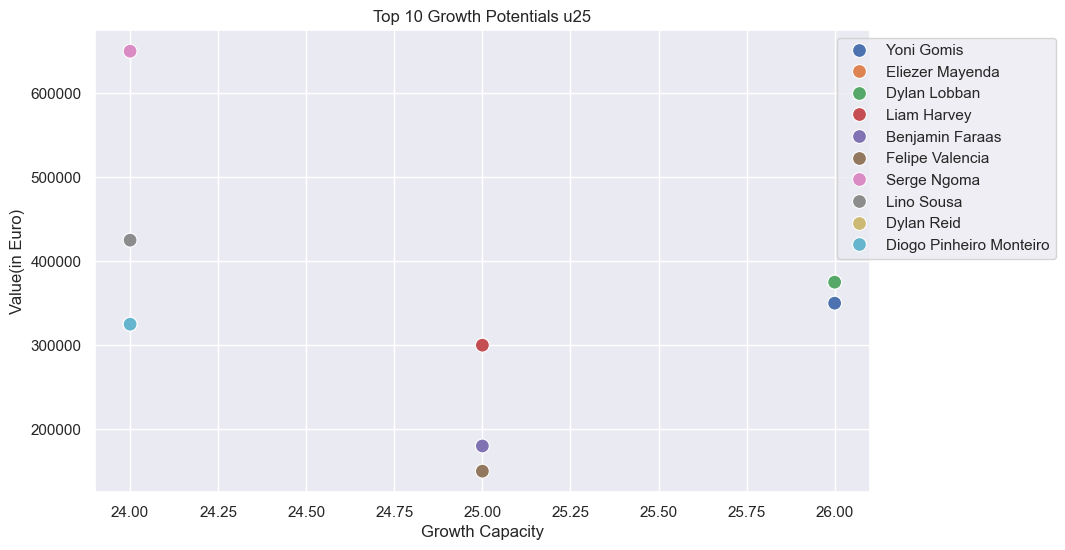

In [17]:
'''
So while we have seen the players u25 with the highest potential and overall ratings, the difference 
between the two / space for a player to grow into even at the bottom of the list was only 7 points away,
and every player listed already had a high market value. Not exactly helpful for a manager who might want
to sign up and coming talent, with a lot of room before they hit their potential and whose market value
has yet to reach the value of the top 10 worldwide 
'''
#Now showing the top 10 players in terms of Growth Capacity, with their market values

top_10_growth_potential = players_df.nlargest(10, "Growth Capacity")
result_df = top_10_growth_potential[["Full Name", "Growth Capacity", "Value(in Euro)"]]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Growth Capacity', y='Value(in Euro)', data=result_df, hue='Full Name', palette='deep', s=100)
plt.xlabel('Growth Capacity')
plt.ylabel('Value(in Euro)')
plt.title('Top 10 Growth Potentials u25')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.show()

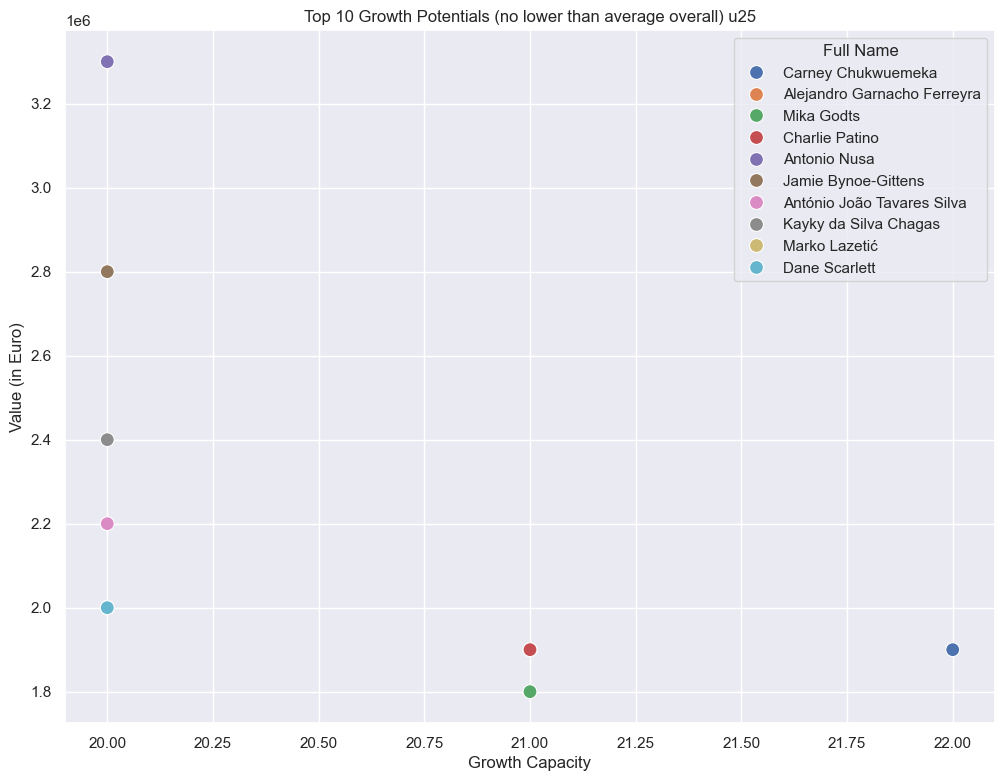

In [18]:
# and the same, but for players whose overall rating is no lower than the U25 average

average_overall_u25 = players_df[players_df["Age"] < 25]["Overall"].mean()
filtered_players = players_df[players_df["Overall"] >= average_overall_u25]
top_10_growth_potential = filtered_players.nlargest(10, "Growth Capacity")

plt.figure(figsize=(12, 9))
scatter_plot = sns.scatterplot(
    x="Growth Capacity", 
    y="Value(in Euro)", 
    data=top_10_growth_potential, 
    hue='Full Name',
    palette='deep',
    s=100,  
)

plt.title('Top 10 Growth Potentials (no lower than average overall) u25')
plt.xlabel('Growth Capacity')
plt.ylabel('Value (in Euro)')
plt.show()


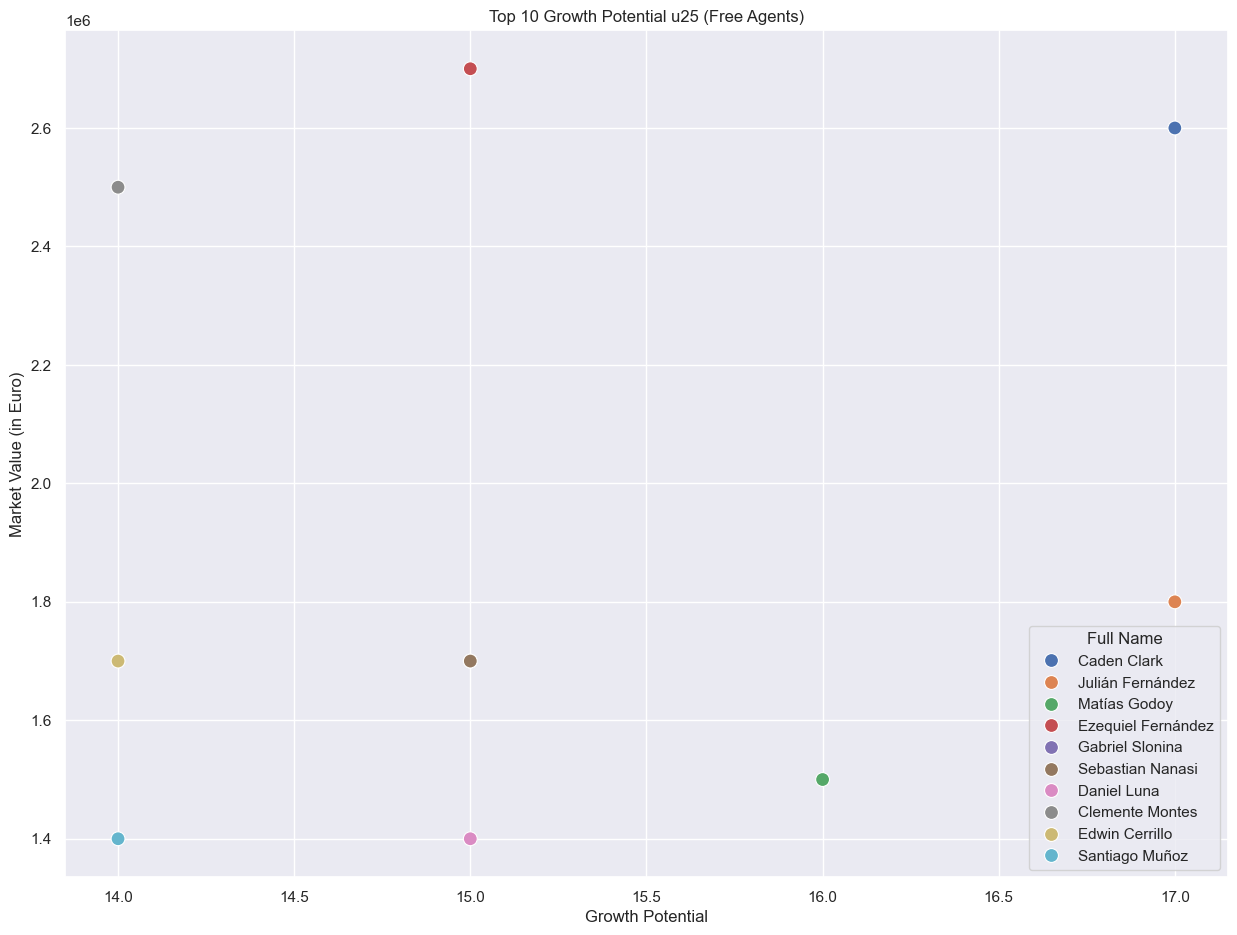

In [19]:
'''
managers who are working even further in restriction in terms of budget, or are after even bigger value for money
could also benefit from these stats for Free Agents, aswell as players who are below the average market value
'''
#free agents

filtered_players = players_df[
    (players_df["Overall"] >= average_overall_u25) &
    (players_df['Free Agent'])
]

top_10_growth_capacity = filtered_players.nlargest(10, "Growth Capacity")

plt.figure(figsize=(15, 11))
scatter_plot = sns.scatterplot(
    x="Growth Capacity",
    y="Value(in Euro)", 
    data=top_10_growth_capacity, 
    hue="Full Name",
    palette='deep',
    s=100,
)

plt.title('Top 10 Growth Potential u25 (Free Agents)')
plt.xlabel('Growth Potential')
plt.ylabel('Market Value (in Euro)')
plt.show()

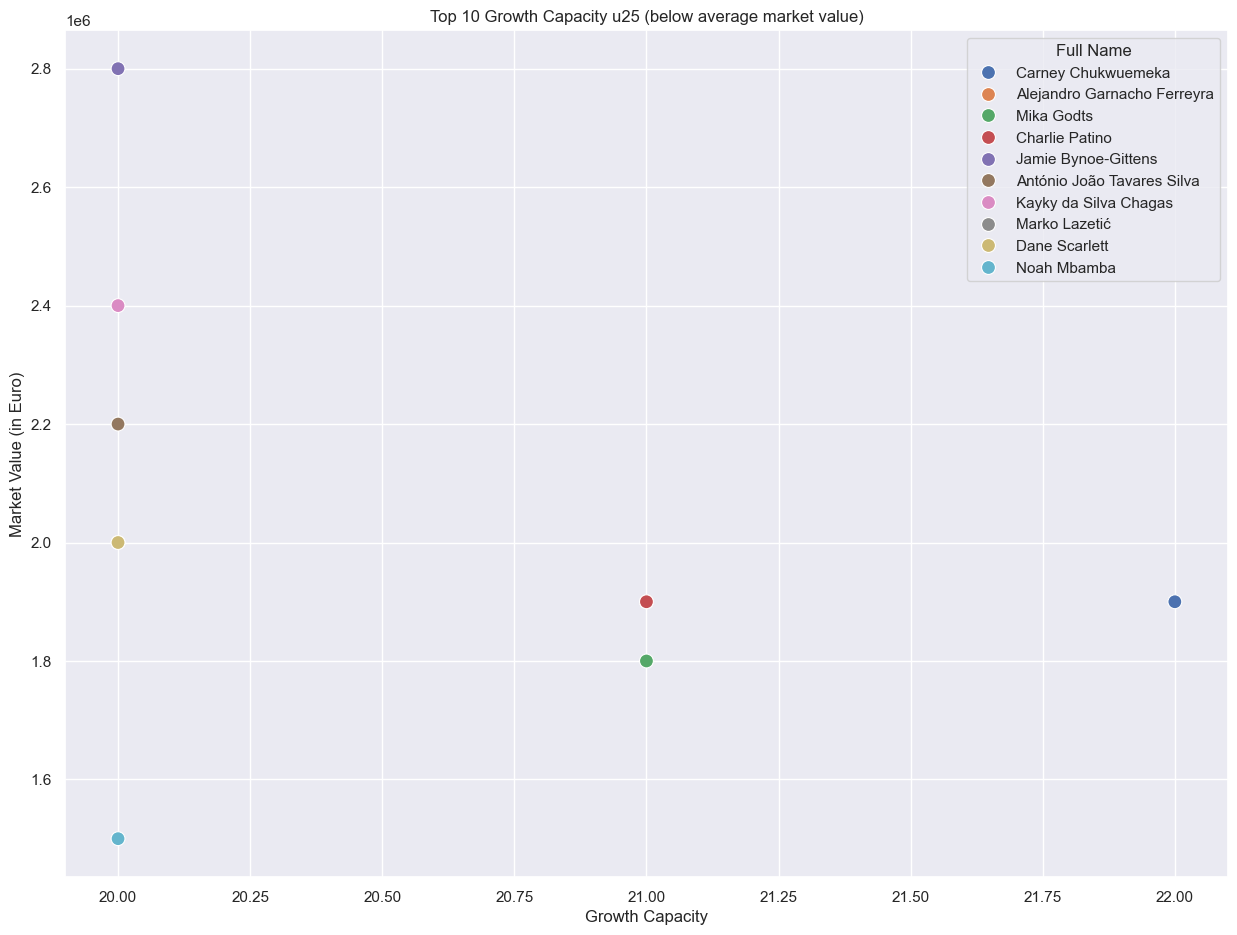

In [20]:
#below the average market value 

average_value = players_df["Value(in Euro)"].mean()

filtered_players_below_average = players_df[players_df["Overall"] >= average_overall_u25]
filtered_players_below_average = filtered_players_below_average[filtered_players_below_average["Value(in Euro)"] <= average_value]

top_10_players_below_average = filtered_players_below_average.nlargest(10, "Growth Capacity")

result_df_below_average = top_10_players_below_average[["Full Name", "Growth Capacity", "Value(in Euro)"]]

plt.figure(figsize=(15, 11))
scatter_plot_below_average = sns.scatterplot(
    x="Growth Capacity", 
    y="Value(in Euro)", 
    data=top_10_players_below_average, 
    hue="Full Name",
    palette='deep',
    s=100,  
)

plt.title('Top 10 Growth Capacity u25 (below average market value)')
plt.xlabel('Growth Capacity')
plt.ylabel('Market Value (in Euro)')
plt.show()

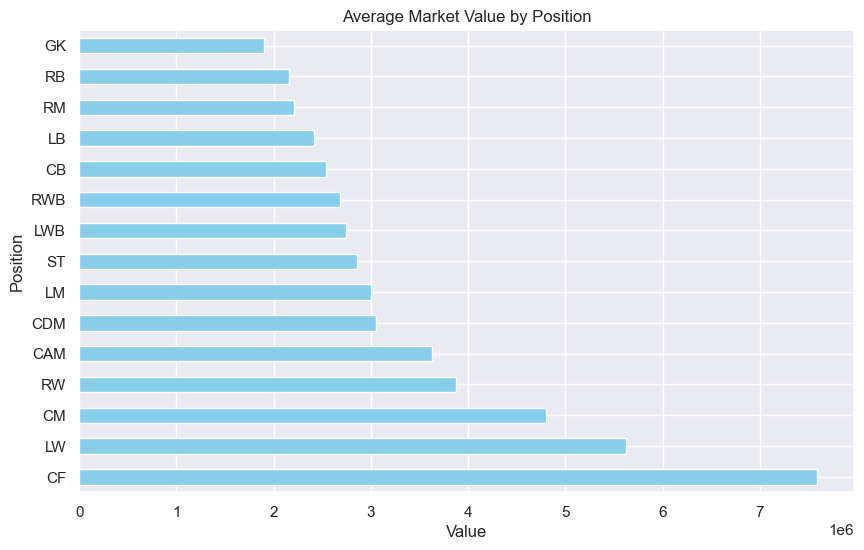

In [21]:
#And what positions return the highest market value on average?
#1 = 1mill

average_values = players_df.groupby('Best Position')['Value(in Euro)'].mean()
most_valuable = average_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
most_valuable.plot(kind='barh', color='skyblue')
plt.title('Average Market Value by Position')
plt.xlabel('Value')
plt.ylabel('Position')
plt.show()

C:\Users\Jon S\AppData\Local\Temp\ipykernel_620\617123502.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=physical_value_correlation['Overall'].drop(['Overall', 'Potential']), y=physical_value_correlation.index.drop(['Overall', 'Potential']), palette='viridis', ax=axes[0])
C:\Users\Jon S\AppData\Local\Temp\ipykernel_620\617123502.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=physical_value_correlation['Potential'].drop(['Overall', 'Potential']), y=physical_value_correlation.index.drop(['Overall', 'Potential']), palette='viridis', ax=axes[1])


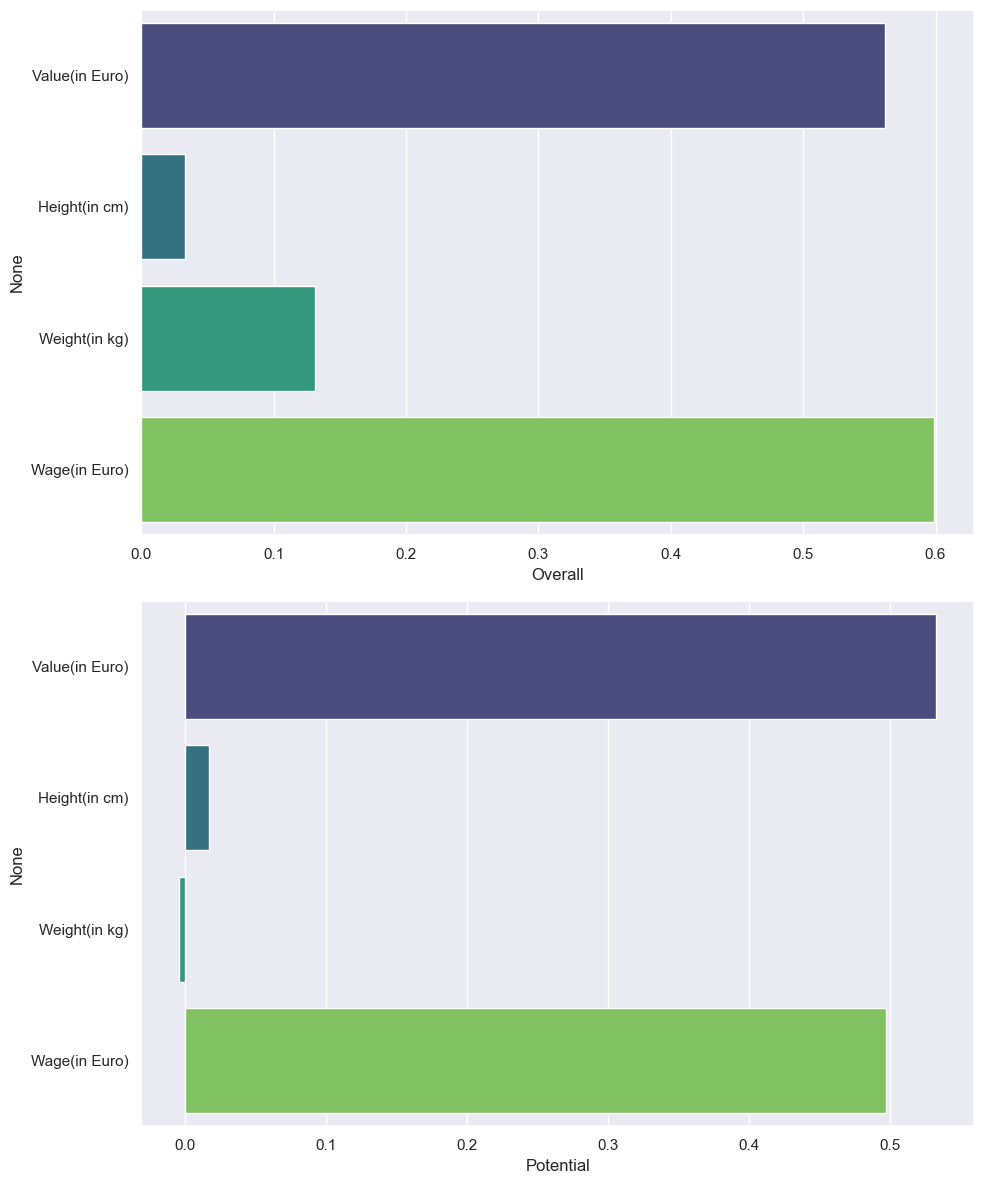

In [22]:
'''
But if a manager wanted to keep an eye on the attributes that are most correlated with players' overall
and potential ratings, what should they look out for?
'''

#physical and monetary attributes

physical_value_correlation = players_df[['Overall', 'Potential', 'Value(in Euro)', 'Height(in cm)', 'Weight(in kg)', 'Wage(in Euro)']].corr()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

sns.barplot(x=physical_value_correlation['Overall'].drop(['Overall', 'Potential']), y=physical_value_correlation.index.drop(['Overall', 'Potential']), palette='viridis', ax=axes[0])

sns.barplot(x=physical_value_correlation['Potential'].drop(['Overall', 'Potential']), y=physical_value_correlation.index.drop(['Overall', 'Potential']), palette='viridis', ax=axes[1])

plt.tight_layout()
plt.show()

C:\Users\Jon S\AppData\Local\Temp\ipykernel_620\2868371196.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_correlations_overall.values, y=top_15_correlations_overall.index, palette='viridis')
C:\Users\Jon S\AppData\Local\Temp\ipykernel_620\2868371196.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_correlations_potential.values, y=top_15_correlations_potential.index, palette='viridis')


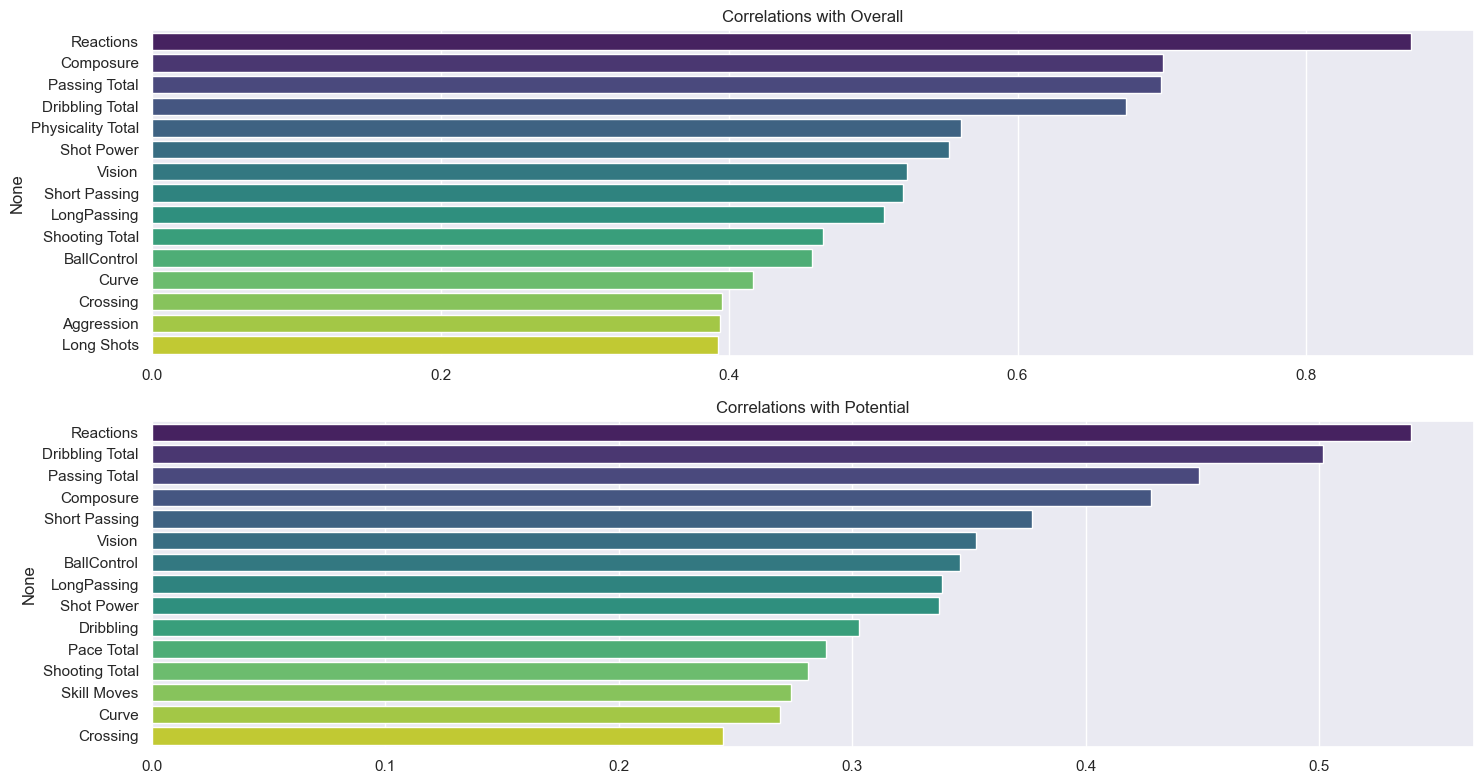

In [23]:
#the same for skill attributes

skill_columns = ['Overall', 'Potential', 'Weak Foot Rating', 'Skill Moves', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle']
skill_correlation = players_df[skill_columns].corr()
top_15_correlations_overall = skill_correlation['Overall'].drop(['Overall', 'Potential']).sort_values(ascending=False).head(15)
top_15_correlations_potential = skill_correlation['Potential'].drop(['Potential', 'Overall']).sort_values(ascending=False).head(15)

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sns.barplot(x=top_15_correlations_overall.values, y=top_15_correlations_overall.index, palette='viridis')
plt.title('Correlations with Overall')

plt.subplot(2, 1, 2)
sns.barplot(x=top_15_correlations_potential.values, y=top_15_correlations_potential.index, palette='viridis')
plt.title('Correlations with Potential')

plt.tight_layout()
plt.show()

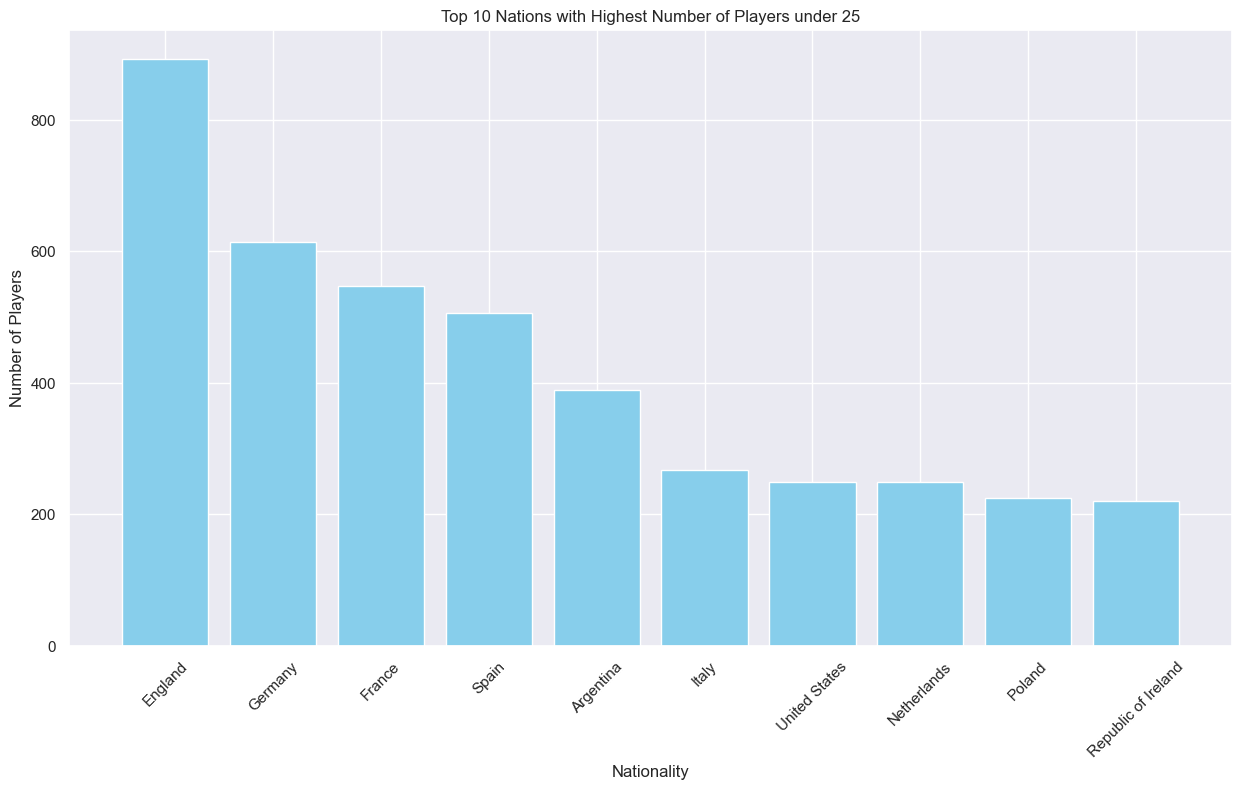

In [70]:
#showing the ten nations with the highest no of players under 25

top_nations_list = top_countries['Nationality'].tolist()
number_of_players_list = top_countries['Number of Players'].tolist()

plt.figure(figsize=(15, 8))
plt.bar(top_nations_list, number_of_players_list, color='skyblue')
plt.title('Top 10 Nations with Highest Number of Players under 25')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45) 
plt.show()


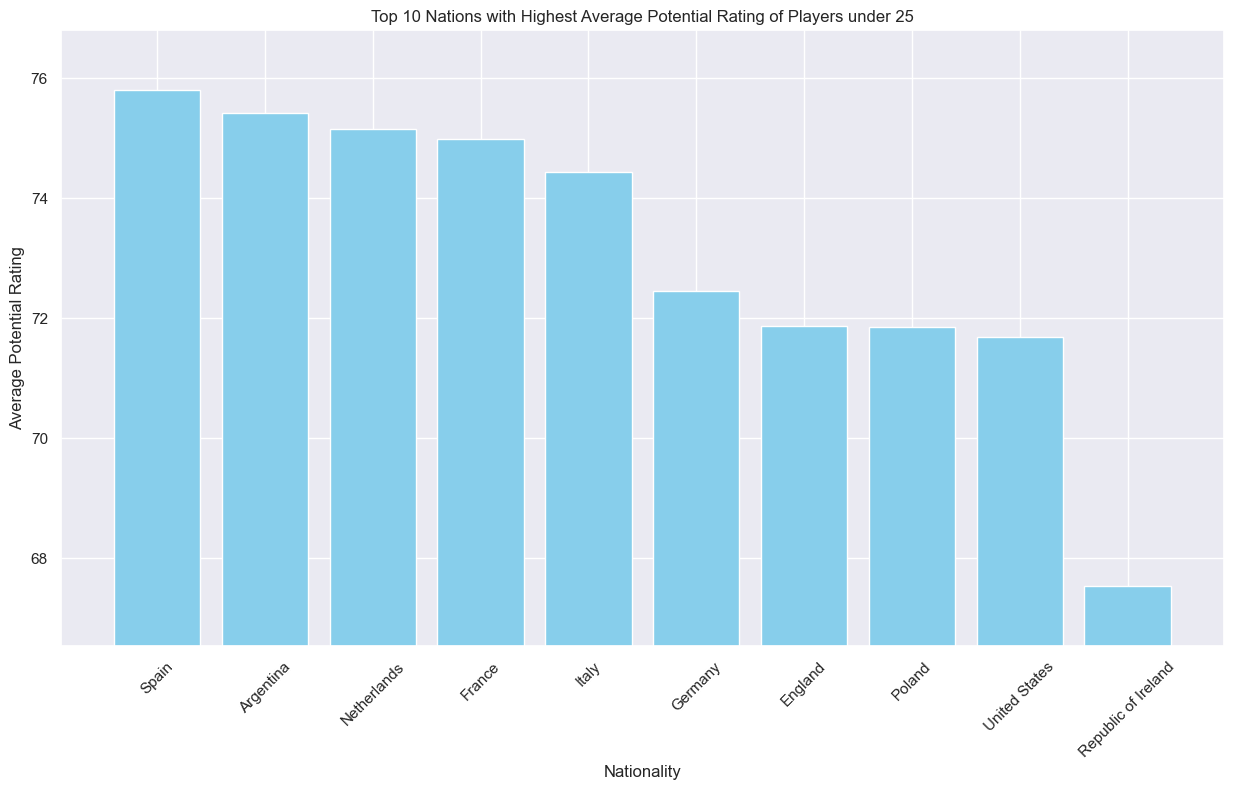

In [73]:
# out of these ten, showing the ten with highest average potential player rating
players_under_25_top_countries = players_df[(players_df['Age'] < 25) & (players_df['Nationality'].isin(top_nations_list))]

top_countries_potential_ratings = players_under_25_top_countries.groupby('Nationality').agg({'Potential': 'mean'}).reset_index()

top_ten_countries_potential_ratings = top_countries_potential_ratings.sort_values(by='Potential', ascending=False).head(10)

plt.figure(figsize=(15, 8))
plt.bar(top_ten_countries_potential_ratings['Nationality'], top_ten_countries_potential_ratings['Potential'], color='skyblue')
plt.title('Top 10 Nations with Highest Average Potential Rating of Players under 25')
plt.xlabel('Nationality')
plt.ylabel('Average Potential Rating')

plt.ylim(top_ten_countries_potential_ratings['Potential'].min() - 1, top_ten_countries_potential_ratings['Potential'].max() + 1)

plt.xticks(rotation=45) 
plt.show()


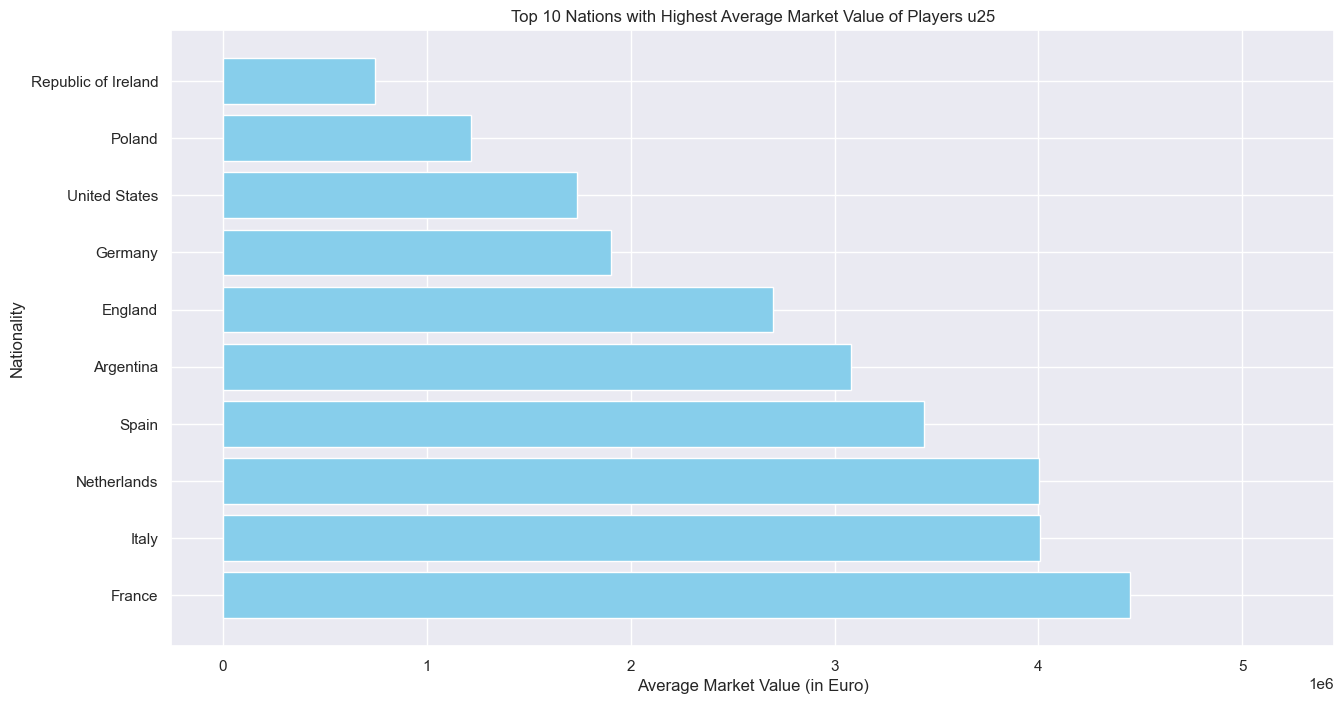

In [72]:
#and finally showing the average market value for players under 25 from these same ten

top_countries_market_value = players_under_25_top_countries.groupby('Nationality')['Value(in Euro)'].mean().reset_index()
top_countries_market_value.columns = ['Nationality', 'Average Market Value']

top_ten_countries_market_value = top_countries_market_value.sort_values(by='Average Market Value', ascending=False).head(10)

plt.figure(figsize=(15, 8))
plt.barh(top_ten_countries_market_value['Nationality'], top_ten_countries_market_value['Average Market Value'], color='skyblue')
plt.title('Top 10 Nations with Highest Average Market Value of Players u25')
plt.ylabel('Nationality')
plt.xlabel('Average Market Value (in Euro)')

plt.xlim(top_ten_countries_market_value['Average Market Value'].min() - 1_000_000, top_ten_countries_market_value['Average Market Value'].max() + 1_000_000)  

plt.show()